# Enhanced predictions for Decision Tree Clasifier

* used data vector version 04
* best result achieved 0,57 (without normalization)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from time import time
from scipy.stats import randint as sp_randint
from sklearn import model_selection

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Selecting vector and running basic comparison of networks

In [2]:
vec = pd.read_csv('learning_vectors/v04/version04-shotstransfermarkt_noNaNs.csv', sep=',')

print(vec.shape)
vec.head()

(6069, 30)


,Match_id,League_id,Season,Stage,Date,H_team,A_team,Result,H_age,A_age,...,H_Form05,A_Form05,H_MeanShots03,A_MeanShots03,H_MeanShots05,A_MeanShots05,H_MeanShotsOnTarget03,A_MeanShotsOnTarget03,H_Better_MeanShotsOnTarget05,A_Better_MeanShotsOnTarget05
0,1730,1729,2008/2009,1,2008-08-16,Arsenal,West Bromwich Albion,0,21.3,24.6,...,7,1,19.000000,11.333333,15.8,10.2,10.666667,5.333333,9.4,4.2
1,1731,1729,2008/2009,1,2008-08-16,Sunderland,Liverpool,2,24.9,23.9,...,3,12,5.333333,16.333333,7.0,15.0,2.333333,8.000000,3.8,8.0
2,1732,1729,2008/2009,1,2008-08-16,West Ham United,Wigan Athletic,0,24.3,25.7,...,5,5,10.666667,13.000000,11.6,14.6,5.666667,6.333333,7.0,8.0
3,1734,1729,2008/2009,1,2008-08-16,Everton,Blackburn Rovers,2,24.4,26.4,...,10,4,10.000000,11.666667,11.4,11.8,5.333333,7.000000,6.0,6.4
4,1735,1729,2008/2009,1,2008-08-16,Middlesbrough,Tottenham Hotspur,0,22.3,22.5,...,11,7,10.000000,8.333333,11.2,9.2,6.666667,5.000000,6.2,5.4


In [3]:
pred = ['H_age','A_age','H_TMV','A_TMV','HS','AS','HST','AST','H_Form03','A_Form03','H_Form05','A_Form05',
     'H_MeanShots03','A_MeanShots03','H_MeanShots05','A_MeanShots05','H_MeanShotsOnTarget03','A_MeanShotsOnTarget03',
     'H_Better_MeanShotsOnTarget05','A_Better_MeanShotsOnTarget05']

X = vec[pred]
y = vec['Result']

algs = []
algs.append(('LR', LogisticRegression()))
algs.append(('LDA', LinearDiscriminantAnalysis()))
algs.append(('KNN', KNeighborsClassifier()))
algs.append(('CART', DecisionTreeClassifier()))
algs.append(('NB', GaussianNB()))
algs.append(('SVM', SVC())) 

results = []
names = []
print ("Alg/res.mean/res.std")
for name, model in algs:
    cross_validator = model_selection.KFold(n_splits=4, shuffle=True)
    res = model_selection.cross_val_score(model, X, y, 
                                          cv=cross_validator, 
                                          scoring = 'accuracy')
    results.append(res)
    names.append(name)
    info = "%s: %f (%f)" % (name, res.mean(), res.std())
    print(info)


Alg/res.mean/res.std
LR: 0.585106 (0.006335)
LDA: 0.581976 (0.008289)
KNN: 0.486240 (0.009804)
CART: 0.471741 (0.006875)
NB: 0.508976 (0.022120)
SVM: 0.473225 (0.015097)


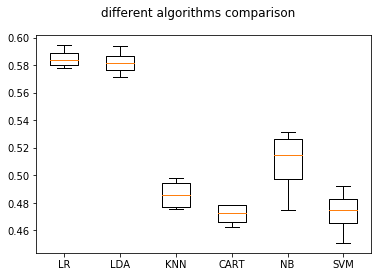

In [4]:
fig = plt.figure()
fig.suptitle('different algorithms comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Enchancing research for Decision Tree Classifier:

In [5]:
# build a classifier
clf = DecisionTreeClassifier()

# possible parameters for Decision Tree Classifier:
clf.get_params().keys()

['presort',
 'splitter',
 'min_impurity_decrease',
 'max_leaf_nodes',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth',
 'class_weight']

In [6]:
# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Params: {0}".format(results['params'][candidate]))
            print("")

In [7]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": sp_randint(3, 8),
              "max_features": sp_randint(10, 21),
              "min_samples_split": sp_randint(4, 21),
              "min_samples_leaf": sp_randint(1, 9),
              "criterion": ["entropy", "gini"]}


# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_, 10)


RandomizedSearchCV took 4.62 seconds for 100 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.559 (std: 0.020)
Params: {'max_features': 15, 'min_samples_split': 12, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}

Model with rank: 2
Mean validation score: 0.558 (std: 0.014)
Params: {'max_features': 16, 'min_samples_split': 20, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}

Model with rank: 3
Mean validation score: 0.557 (std: 0.032)
Params: {'max_features': 17, 'min_samples_split': 15, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7}

Model with rank: 3
Mean validation score: 0.557 (std: 0.021)
Params: {'max_features': 20, 'min_samples_split': 9, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2}

Model with rank: 5
Mean validation score: 0.557 (std: 0.020)
Params: {'max_features': 12, 'min_samples_split': 14, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6}

Model with rank: 6
Mean validation s

In [8]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, 4, 5],
              "max_features": [9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20],
              "min_samples_split": [4, 5, 6, 7, 9, 10, 11, 12, 15, 18, 19, 20],
              "min_samples_leaf": [3, 4, 5, 6, 7, 8],
              "criterion": ["gini", "entropy"]}

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_, 10)


GridSearchCV took 191.70 seconds for 4752 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.565 (std: 0.013)
Params: {'max_features': 18, 'min_samples_split': 11, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8}

Model with rank: 2
Mean validation score: 0.565 (std: 0.018)
Params: {'max_features': 11, 'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3}

Model with rank: 3
Mean validation score: 0.564 (std: 0.014)
Params: {'max_features': 15, 'min_samples_split': 5, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3}

Model with rank: 4
Mean validation score: 0.564 (std: 0.011)
Params: {'max_features': 12, 'min_samples_split': 19, 'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 7}

Model with rank: 5
Mean validation score: 0.563 (std: 0.017)
Params: {'max_features': 12, 'min_samples_split': 10, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3}

Model with rank: 6
Mean validation score: 0